100


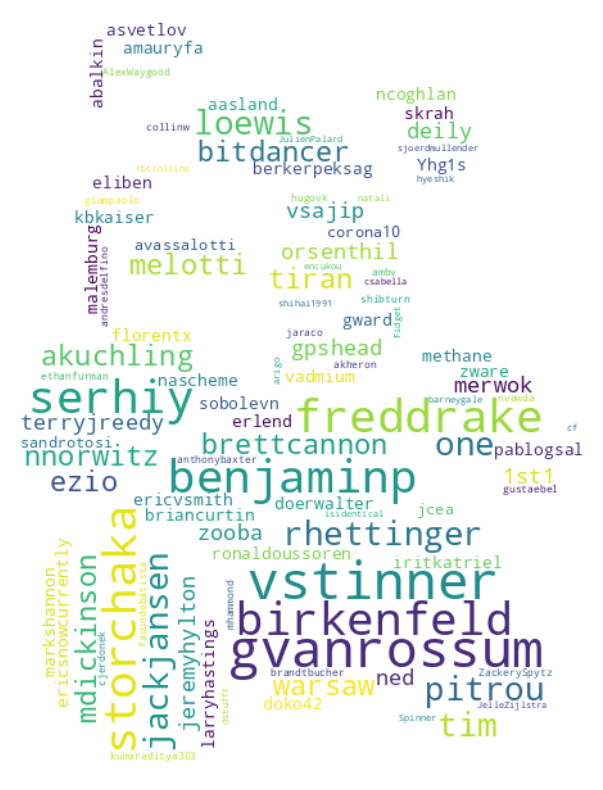

In [28]:
import requests
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def get_contributors(username, repository):
    url = f'https://api.github.com/repos/{username}/{repository}/contributors?per_page=900'
    response = requests.get(url)
    contributors = [contributor['login'] for contributor in response.json()]
    return contributors

def generate_word_cloud(contributors, mask_path):
    text = ' '.join(contributors)

    # Load the panda-shaped mask image
    panda_mask = np.array(Image.open(mask_path))

    # Generate word cloud using the panda mask
    wordcloud = WordCloud(width=1200, height=800, background_color='white', mask=panda_mask, max_words=len(contributors)).generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Example: Get contributors for the pandas repository
username = 'python'
repository = 'cpython'
contributors = get_contributors(username, repository)
print(len(contributors))

# Example: Generate word cloud in the shape of a panda
panda_mask_path = 'pan.jpg'  # Replace with the path to your panda-shaped mask image
generate_word_cloud(contributors, panda_mask_path)


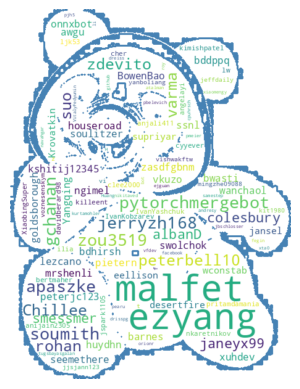

In [29]:
import requests
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

def get_contributors(username, repository):
    url = f'https://api.github.com/repos/{username}/{repository}/contributors?per_page=900'
    response = requests.get(url)
    if response.status_code == 200:
        contributors = [contributor['login'] for contributor in response.json()]
        return contributors
    else:
        print(f"Error: Unable to fetch contributors. Status code: {response.status_code}")
        return []

# Specify the GitHub repository
username = 'pytorch'
repository = 'pytorch'

# Get contributors
contributors = get_contributors(username, repository)

# Convert the list of contributors to a single string
text = ' '.join(contributors)

# Set up the mask
mask_path = 'pan.jpg'  # Replace with the path to your mask image
alice_mask = np.array(Image.open(mask_path))

stopwords = set(STOPWORDS)

# Create WordCloud
wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

# Generate word cloud
wc.generate(text)

# Store to file
output_path = 'contributors_wordcloud.png'  # Replace with the desired output path
wc.to_file(output_path)

# Show the word cloud
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [22]:
import requests, json

logins = json.loads(requests.get("https://api.github.com/repos/istio/istio/contributors?per_page=200").text)
print(len(logins))
for login in logins:
    print(f"{login['login']} has {login['contributions']} commits")

100
howardjohn has 2908 commits
istio-testing has 2399 commits
hzxuzhonghu has 842 commits
ramaraochavali has 704 commits
kyessenov has 477 commits
douglas-reid has 420 commits
rshriram has 364 commits
costinm has 350 commits
geeknoid has 326 commits
ayj has 317 commits
nmittler has 301 commits
bianpengyuan has 289 commits
hanxiaop has 284 commits
ostromart has 271 commits
stevenctl has 271 commits
frankbu has 262 commits
esnible has 250 commits
mandarjog has 249 commits
sebastienvas has 239 commits
ozevren has 232 commits
yangminzhu has 201 commits
ymesika has 197 commits
zirain has 196 commits
richardwxn has 176 commits
ldemailly has 175 commits
andraxylia has 172 commits
myidpt has 161 commits
ericvn has 161 commits
JimmyCYJ has 161 commits
linsun has 149 commits
hklai has 145 commits
guptasu has 145 commits
quanjielin has 140 commits
GregHanson has 136 commits
diemtvu has 133 commits
wattli has 130 commits
jwendell has 130 commits
Monkeyanator has 120 commits
lookuptable has 120 co

Number of contributors: 100


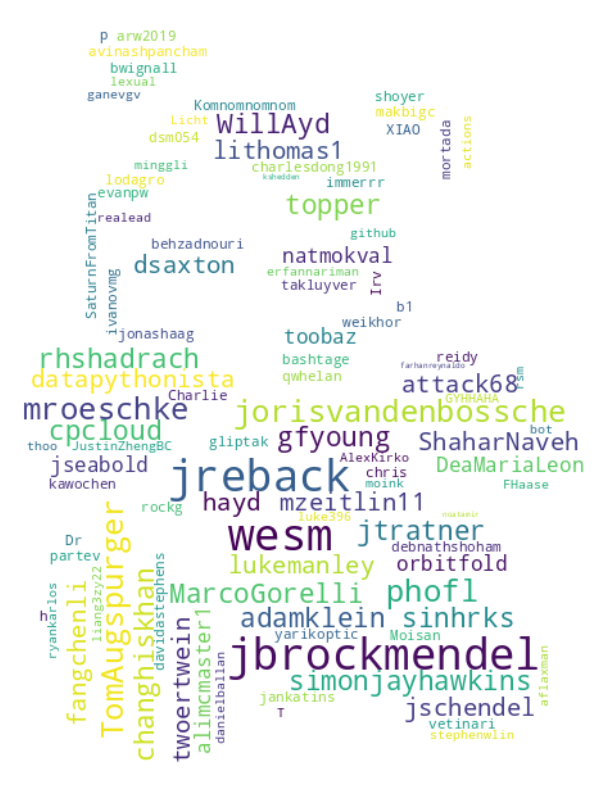

In [20]:
import requests
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def get_contributors(username, repository):
    url = f'https://api.github.com/repos/{username}/{repository}/contributors?per_page=120'
    response = requests.get(url)
    if response.status_code == 200:
        contributors = [contributor['login'] for contributor in response.json()]
        return contributors
    else:
        print(f"Error: Unable to fetch contributors. Status code: {response.status_code}")
        return []

def generate_word_cloud(contributors, mask_path):
    text = ' '.join(contributors)

    # Load the panda-shaped mask image
    panda_mask = np.array(Image.open(mask_path))

    # Generate word cloud using the panda mask
    wordcloud = WordCloud(width=1200, height=800, background_color='white', mask=panda_mask, max_words=len(contributors)).generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Example: Get contributors for the pandas repository
username = 'pandas-dev'
repository = 'pandas'
contributors = get_contributors(username, repository)

# Check the number of contributors fetched
print(f"Number of contributors: {len(contributors)}")

# Example: Generate word cloud in the shape of a panda
panda_mask_path = 'pan.jpg'  # Replace with the path to your panda-shaped mask image

# Generate word cloud only if contributors were successfully fetched
if contributors:
    generate_word_cloud(contributors, panda_mask_path)
else:
    print("No contributors to generate a word cloud.")


In [12]:
print(contributors)


['jbrockmendel', 'jreback', 'wesm', 'jorisvandenbossche', 'mroeschke', 'phofl', 'TomAugspurger', 'simonjayhawkins', 'cpcloud', 'gfyoung', 'topper-123', 'sinhrks', 'rhshadrach', 'adamklein', 'MarcoGorelli', 'WillAyd', 'jtratner', 'changhiskhan', 'datapythonista', 'lithomas1', 'ShaharNaveh', 'lukemanley', 'attack68', 'twoertwein', 'jschendel', 'hayd', 'dsaxton', 'fangchenli', 'mzeitlin11', 'DeaMariaLeon']


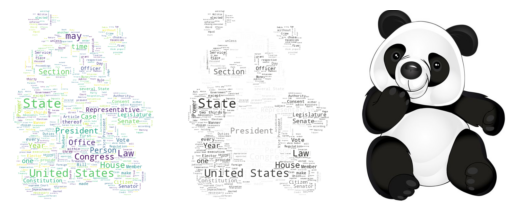

In [11]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, 'constitution.txt')).read()

# read the mask / color image taken from
# http://jirkavinse.deviantart.com/art/quot-Real-Life-quot-Alice-282261010
alice_coloring = np.array(Image.open(path.join(d, "pan.jpg")))
stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=alice_coloring,
               stopwords=stopwords, max_font_size=40, random_state=42)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(alice_coloring)

# show
fig, axes = plt.subplots(1, 3)
axes[0].imshow(wc, interpolation="bilinear")
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
axes[1].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
axes[2].imshow(alice_coloring, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off()
plt.show()

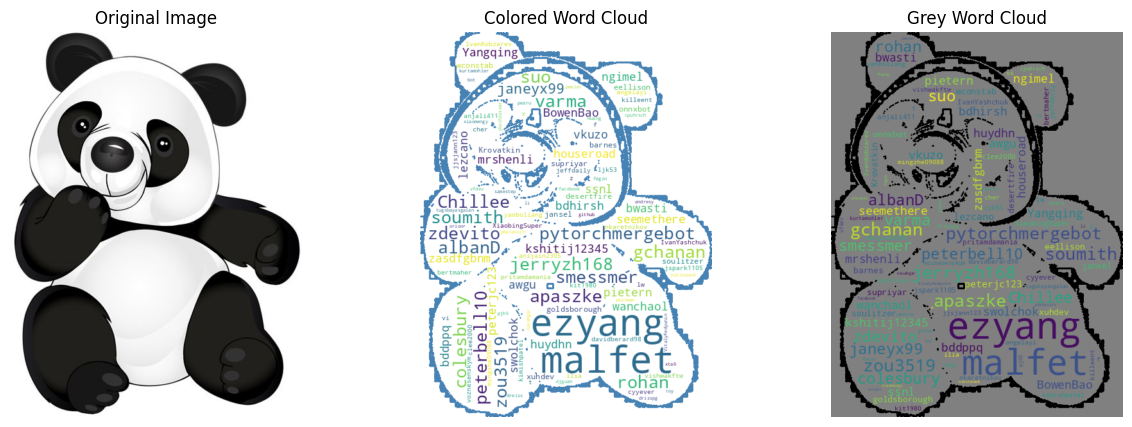

In [30]:
import requests
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

def get_contributors(username, repository, limit=300):
    url = f'https://api.github.com/repos/{username}/{repository}/contributors?per_page=400'
    response = requests.get(url)
    if response.status_code == 200:
        contributors = [contributor['login'] for contributor in response.json()[:limit]]
        return contributors
    else:
        print(f"Error: Unable to fetch contributors. Status code: {response.status_code}")
        return []

# Specify the GitHub repository
username = 'pytorch'
repository = 'pytorch'

# Get contributors (limit to 300)
contributors = get_contributors(username, repository, limit=300)

# Convert the list of contributors to a single string
text = ' '.join(contributors)

# Set up the mask
mask_path = 'pan.jpg'  # Replace with the path to your mask image
alice_mask = np.array(Image.open(mask_path))

stopwords = set(STOPWORDS)

# Create WordCloud for colored word cloud
wc_colored = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
                      stopwords=stopwords, contour_width=3, contour_color='steelblue')

# Generate colored word cloud
wc_colored.generate(text)

# Create WordCloud for grey word cloud
wc_grey = WordCloud(background_color="grey", max_words=2000, mask=alice_mask,
                    stopwords=stopwords, contour_width=3, contour_color='black')

# Generate grey word cloud
wc_grey.generate(text)

# Display the original image, colored word cloud, and grey word cloud side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original image
axes[0].imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
axes[0].set_title('Original Image')
axes[0].axis("off")

# Colored word cloud
axes[1].imshow(wc_colored, interpolation='bilinear')
axes[1].set_title('Colored Word Cloud')
axes[1].axis("off")

# Grey word cloud
axes[2].imshow(wc_grey, interpolation='bilinear', cmap=plt.cm.gray)
axes[2].set_title('Grey Word Cloud')
axes[2].axis("off")

plt.show()
